In [1]:
## Importing Important Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from IPython.display import Image

In [2]:
## Loading the Dataset
df = pd.read_csv('train_dataset.csv')

In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
## Find no. of null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
## Fill the missing values for NUMERICAL TERMS - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [7]:
## Fill the missing values for CATERGORIAL TERMS - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [8]:
## Check again to confirm that all the null values have been replaced
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
## Since Total income would be a better parameter than Applicant and Co-Applicant Income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [10]:
# Apply log transformation to the attribute for ease of use
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
df['Total_Income_Log'] = np.log(df['Total_Income'])
df['LoanAmountLog'] = np.log(df['LoanAmount'])

<AxesSubplot:>

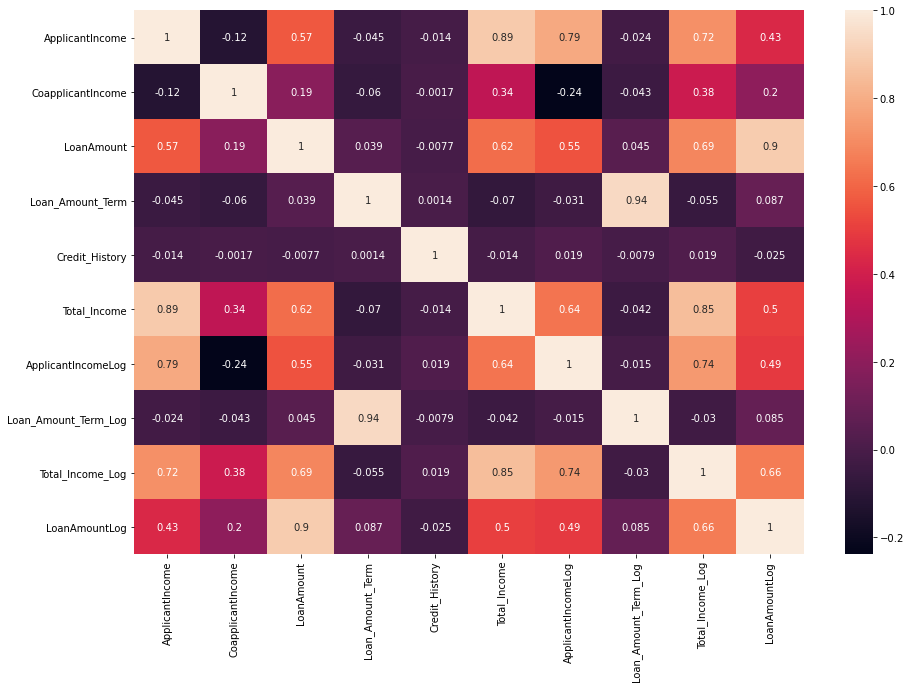

In [11]:
## Getting correlation between different predictors
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True)

In [12]:
## Dropping unnecessary columns
cols = ['CoapplicantIncome','Loan_ID','Total_Income','ApplicantIncome','LoanAmount','Loan_Amount_Term']
df = df.drop(columns=cols,axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,Loan_Amount_Term_Log,Total_Income_Log,LoanAmountLog
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,5.886104,8.674026,4.986426
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,5.886104,8.714568,4.852030
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,5.886104,8.006368,4.189655
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,5.886104,8.505323,4.787492
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,5.886104,8.699515,4.948760


In [13]:
## Label Encoding to deal with the Categorial Data
df['Gender'].value_counts()
df['Gender'] = df['Gender'].replace({'Male':1, 'Female':0})
df['Married'].value_counts()
df['Married'] = df['Married'].replace({'Yes':1, 'No':0})
df['Dependents'].value_counts()
df['Dependents'] = df['Dependents'].replace({'0':0, '1':1, '2':2, '3+':3})
df['Education'].value_counts()
df['Education'] = df['Education'].replace({'Graduate':1, 'Not Graduate':0})
df['Property_Area'].value_counts()
df['Property_Area'] = df['Property_Area'].replace({'Urban':2, 'Semiurban':1, 'Rural':0})
df['Self_Employed'] = df['Self_Employed'].replace({'Yes':1, 'No':0})
df['Loan_Status'] = df['Loan_Status'].replace({'Y': 1, 'N': 0})

In [14]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,Loan_Amount_Term_Log,Total_Income_Log,LoanAmountLog
0,1,0,0,1,0,1.0,2,1,8.674026,5.886104,8.674026,4.986426
1,1,1,1,1,0,1.0,0,0,8.430109,5.886104,8.714568,4.852030
2,1,1,0,1,1,1.0,2,1,8.006368,5.886104,8.006368,4.189655
3,1,1,0,0,0,1.0,2,1,7.856707,5.886104,8.505323,4.787492
4,1,0,0,1,0,1.0,2,1,8.699515,5.886104,8.699515,4.948760


In [15]:
## Specify input and output attributes for Training Dataset
x = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [16]:
##        MODEL TRAINING          ##
## Classify function
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy on test set is", model.score(x_test, y_test)*100)
    print("Accuracy on train set is", model.score(x_train,y_train)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x , y , cv=5)
    print("Cross validation is",np.mean(score)*100)

In [17]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, x , y)

Accuracy on test set is 78.86178861788618
Accuracy on train set is 81.4663951120163
Cross validation is 80.9462881514061


In [18]:
## Desicion Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, x, y)

Accuracy on test set is 70.73170731707317
Accuracy on train set is 100.0
Cross validation is 71.82460349193656


In [19]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, x, y)

Accuracy on test set is 78.04878048780488
Accuracy on train set is 100.0
Cross validation is 78.66719978675198


In [20]:
## Gradient Boosting Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
#---
#Hyperparameters
num_estimators = [250, 500, 750]
learn_rates = [0.05, 0.075,  0.1]
max_depths = [3, 4, 5]
min_samples_leaf = [2, 3]
min_samples_split = [2, 5, 7]
#---
param_grid = {'n_estimators': num_estimators, 'learning_rate': learn_rates, 'max_depth': max_depths, 'min_samples_leaf': min_samples_leaf,'min_samples_split': min_samples_split}
model = GradientBoostingClassifier()
kfold = KFold(n_splits=10)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, n_jobs=2)
grid_result = grid.fit(x,y)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
grid.score(x_train,y_train)

0.9124236252545825

In [22]:
grid.score(x_test,y_test)

0.8861788617886179

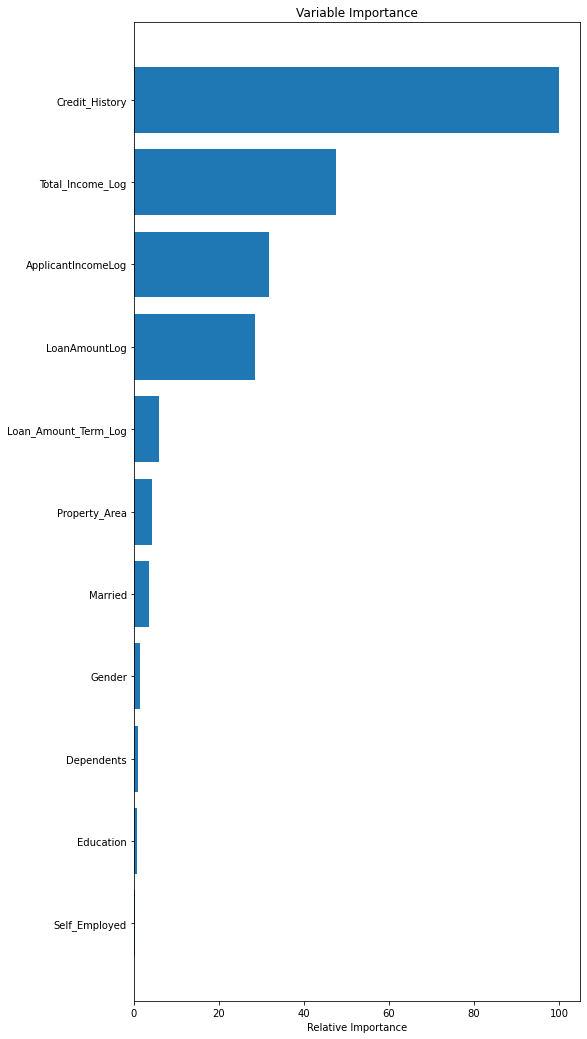

In [23]:
feature_importance = grid.best_estimator_.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 18))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
i1 = int(input("Applicant Income = "))

In [ ]:
i2 = int(input("Co-Applicant Income = "))

In [ ]:
i3 = int(input("Loan Amount = "))

In [ ]:
i4 = int(input("Loan Term = "))

In [ ]:
i5 = int(input("Property Area (Enter 2 if 'Urban', 1 if 'Semi-Urban', 0 if 'Rural') = "))

In [ ]:
i6 = int(input("Married (Enter 1 if 'Yes', 0 if 'No')  = "))

In [ ]:
i7 = int(input("Gender (Enter 1 if 'Male', 0 if 'Female') = "))

In [ ]:
i8 = int(input("Number of Dependents (Enter 0 if 0 Dependents, 1 if 1 Dependent, 2 if 2 Dependents, 3 if 3 or more Dependents) = "))

In [ ]:
i9 = int(input("Wether you are self Employed or not? (Enter 1 if 'Yes', 0 if 'No')"))

In [ ]:
i10 = int(input("Education (Enter 1 if 'Graduate', 0 otherwise) = "))

In [ ]:
i11 = int(input("Credit History (Enter 1 if no pending loans, 0 otherwise) = "))

In [ ]:
df_test = pd.DataFrame([{'Gender':i7,'Married':i6,'Dependents':i8,'Education':i10,'Self_Employed':i9,'Credit History':i11,'Property_Area':i5,'ApplicantIncomeLog':np.log(i1),'Loan_Amount_Term_Log':np.log(i4),'Total_Income_Log':np.log(i1+i2),'LoanAmountLog':np.log(i3)}])

In [ ]:
result = grid.predict(df_test)
if result[0]==1:
    display(Image(url= "Yes.jpg", width=400, height=400))
else:
    display(Image(url= "No.jpg", width=400, height=400))